# **Sentiment Analysis for IMDB Dataset**

## *Import Dependencies*

In [1]:
import re
import nltk
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## *Load Data and Data Preprocessing*

In [3]:
df = pd.read_csv('imdb-reviews-data/IMDB Dataset.csv')

In [4]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
stop_words = set(stopwords.words('english'))

In [6]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)      # to rermove html tags
    text = re.sub(r'[^\w\s]', '', text)    # to remove punctuations
    text = re.sub(r'\d+', '', text)        # to remove numbers
    
    text = text.lower()                    # to convert text to lower case
    
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

In [7]:
df['clean_review'] = df['review'].apply(preprocess_text)

In [8]:
df[['review', 'clean_review']].head(10)

,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...
5,"Probably my all-time favorite movie, a story o...",probably alltime favorite movie story selfless...
6,I sure would like to see a resurrection of a u...,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,encouraged positive comments film looking forw...
9,If you like original gut wrenching laughter yo...,like original gut wrenching laughter like movi...


In [9]:
df.drop(columns=['review'], inplace=True)

## *Text Vectorization*

In [10]:
vectorizer = TfidfVectorizer(max_features=40000)

X = vectorizer.fit_transform(df['clean_review'])

print(X.shape)

(50000, 40000)


## *Splitting Data into Train and Test*

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=39)

## *Training Model*

In [12]:
rf = RandomForestClassifier(n_estimators=80)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [13]:
y_pred = rf.predict(X_test)

## *Model Evaluation*

In [14]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(report)

Accuracy: 0.8548
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      5039
    positive       0.85      0.85      0.85      4961

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## *Results Visualization*

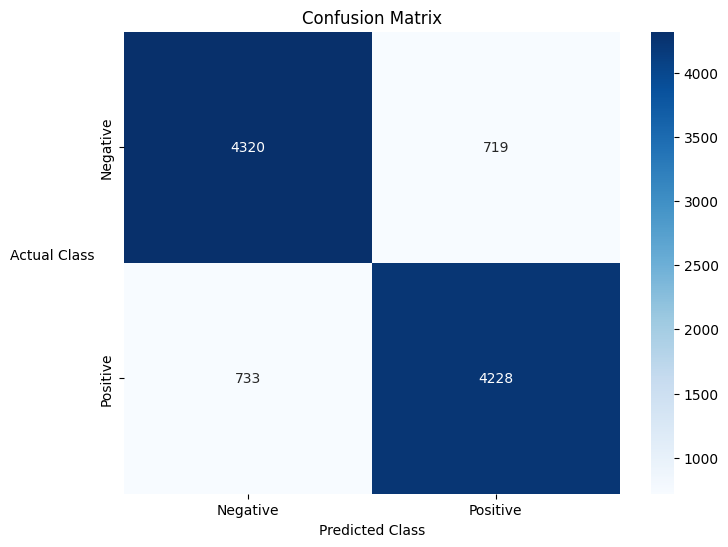

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class', rotation=0, ha='right')
plt.title('Confusion Matrix')
plt.show()